<a href="https://colab.research.google.com/github/tobeywang/2nd-ML100Days/blob/master/Day_070_Keras_Mnist_MLP_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [0]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [0]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
#建立模型
model = Sequential()

In [0]:
#建構輸入層 
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
#增加一層
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

In [0]:
#增加一層
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

In [0]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [144]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_37 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [157]:
#改為三層後
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_39 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_40 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_41 (Dense)             (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [159]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 149us/step - loss: 0.2370 - acc: 0.9266 - val_loss: 0.1275 - val_acc: 0.9609
Epoch 2/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.0967 - acc: 0.9709 - val_loss: 0.1048 - val_acc: 0.9687
Epoch 3/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.0682 - acc: 0.9788 - val_loss: 0.1234 - val_acc: 0.9676
Epoch 4/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.0550 - acc: 0.9827 - val_loss: 0.1058 - val_acc: 0.9711
Epoch 5/10
48000/48000 [==============================] - 6s 134us/step - loss: 0.0431 - acc: 0.9863 - val_loss: 0.0862 - val_acc: 0.9776
Epoch 6/10
48000/48000 [==============================] - 6s 131us/step - loss: 0.0352 - acc: 0.9892 - val_loss: 0.1060 - val_acc: 0.9727
Epoch 7/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.0298 - acc: 0.9905 - val_loss: 0.0966 - 

# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

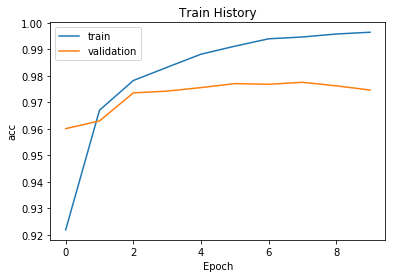

In [0]:
show_train_history(train_history,'acc','val_acc')

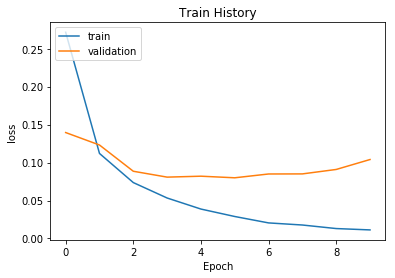

In [0]:
show_train_history(train_history,'loss','val_loss')

# 建立三層後 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

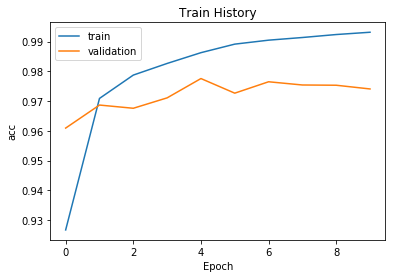

In [161]:
show_train_history(train_history,'acc','val_acc')

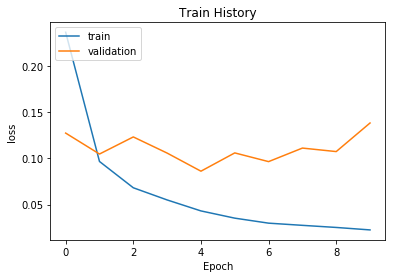

In [162]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [150]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 46us/step

accuracy= 0.9787


# 建立三層後 評估模型準確率

In [163]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 50us/step

accuracy= 0.9761
